In [0]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# 為替レートデータ（DEXJPUS）をロード
start_date = '2001/1/2'
end_date = '2016/12/30'

fx_jpusdata = pdr.DataReader('DEXJPUS', 'fred', start_date, end_date)
fx_jpusdata.head(20)

,DEXJPUS
DATE,
2001-01-02,114.73
2001-01-03,114.26
2001-01-04,115.47
2001-01-05,116.19
2001-01-08,115.97
2001-01-09,116.64
2001-01-10,116.26
2001-01-11,117.56
2001-01-12,117.76


In [0]:
# 特定の年月のデータを参照する
fx_jpusdata['2016-04'].head()

,DEXJPUS
DATE,
2016-04-01,112.06
2016-04-04,111.18
2016-04-05,110.26
2016-04-06,109.63
2016-04-07,107.98


### resample

In [0]:
# 月の平均値を表示
fx_jpusdata.resample('M').mean().head()

,DEXJPUS
DATE,
2001-01-31,116.671905
2001-02-28,116.233684
2001-03-31,121.505000
2001-04-30,123.770952
2001-05-31,121.768182


In [0]:
# 月末レートを表示
fx_jpusdata.resample('M').last().head()

,DEXJPUS
DATE,
2001-01-31,116.39
2001-02-28,117.28
2001-03-31,125.54
2001-04-30,123.57
2001-05-31,118.88


In [0]:
# 毎月15日と月末を表示
fx_jpusdata.resample('SM').mean().head()

,DEXJPUS
DATE,
2000-12-31,116.093333
2001-01-15,117.170909
2001-01-31,116.262727
2001-02-15,116.082500
2001-02-28,119.318182


In [0]:
# 4半期毎に表示
fx_jpusdata.resample('Q').mean().head()

,DEXJPUS
DATE,
2001-03-31,118.252581
2001-06-30,122.616563
2001-09-30,121.627581
2001-12-31,123.741613
2002-03-31,132.423607


### shift

In [0]:
# データをずらす
fx_jpusdata.shift(1).head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,114.73
2001-01-04,114.26
2001-01-05,115.47
2001-01-08,116.19


In [0]:
# データをずらす
fx_jpusdata.shift(3).head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,NaN
2001-01-05,114.73
2001-01-08,114.26


In [0]:
# データをずらして変化の差を計算する
fx_jpsdata_diff = fx_jpusdata - fx_jpusdata.shift(1)
fx_jpsdata_diff.head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,-0.47
2001-01-04,1.21
2001-01-05,0.72
2001-01-08,-0.22


In [0]:
# データの変化の差を計算する
fx_jpsdata_diff = fx_jpusdata.diff()
fx_jpsdata_diff.head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,-0.47
2001-01-04,1.21
2001-01-05,0.72
2001-01-08,-0.22


In [0]:
# データを2日分ずらして変化の差を計算する
fx_jpsdata_diff = fx_jpusdata - fx_jpusdata.shift(2)
fx_jpsdata_diff.head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,0.74
2001-01-05,1.93
2001-01-08,0.50


In [0]:
# データの変化の差を計算する
fx_jpsdata_diff = fx_jpusdata.diff(2)
fx_jpsdata_diff.head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,0.74
2001-01-05,1.93
2001-01-08,0.50


In [0]:
# データをずらして変化率を計算する
fx_jpsdata_ratio = (fx_jpusdata - fx_jpusdata.shift(1)) / fx_jpusdata.shift(1)
fx_jpsdata_ratio.head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,-0.004097
2001-01-04,0.010590
2001-01-05,0.006235
2001-01-08,-0.001893


In [0]:
# データの変化の比率を計算する
fx_jpsdata_ratio = fx_jpusdata.pct_change()
fx_jpsdata_ratio.head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,-0.004097
2001-01-04,0.010590
2001-01-05,0.006235
2001-01-08,-0.001893


### rolling

In [0]:
# 3日間の移動平均を計算
fx_jpusdata_full = fx_jpusdata.dropna()
print(fx_jpusdata_full.head())  # 比較用

fx_jpusdata_full.rolling(3).mean().head()

            DEXJPUS
DATE               
2001-01-02   114.73
2001-01-03   114.26
2001-01-04   115.47
2001-01-05   116.19
2001-01-08   115.97


,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,114.820000
2001-01-05,115.306667
2001-01-08,115.876667


In [0]:
# 3日間の標準偏差を計算
fx_jpusdata_full = fx_jpusdata.dropna()
print(fx_jpusdata_full.head())  # 比較用

fx_jpusdata_full.rolling(3).std().head()

            DEXJPUS
DATE               
2001-01-02   114.73
2001-01-03   114.26
2001-01-04   115.47
2001-01-05   116.19
2001-01-08   115.97


,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,0.610000
2001-01-05,0.975312
2001-01-08,0.368963


### Q．年ごとの各平均値を表示してください。

In [0]:
fx_jpusdata.resample('Y').mean().head()

,DEXJPUS
DATE,
2001-12-31,121.568040
2002-12-31,125.220438
2003-12-31,115.938685
2004-12-31,108.150830
2005-12-31,110.106932


### Ｑ．10日間の移動平均を作成してください。ただし、移動平均の計算前にNaNは削除してください。

In [0]:
fx_jpusdata_full =  fx_jpusdata.dropna()
fx_jpusdata_full.rolling(10).mean().head(20)

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,NaN
2001-01-05,NaN
2001-01-08,NaN
2001-01-09,NaN
2001-01-10,NaN
2001-01-11,NaN
2001-01-12,NaN


##  時系列の可視化

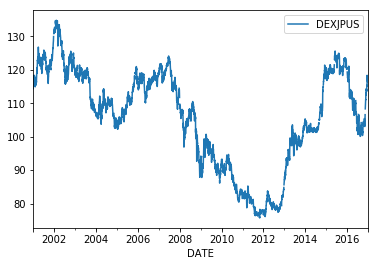

In [0]:
fx_jpusdata.plot()

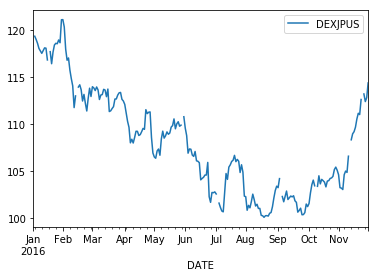

In [0]:
# 期間指定
fx_jpusdata.loc['2016-01': '2016-11'].plot()

In [0]:
# 複数のデータの描画
merge_data_jpusdata = pd.concat([
    fx_jpusdata,
    fx_jpusdata.rolling(3).mean(),
    fx_jpusdata.rolling(7).mean(),
], axis=1)
merge_data_jpusdata.columns = ['today', 'roll_3', 'roll_7']
data = merge_data_jpusdata.dropna()
data.head()

,today,roll_3,roll_7
DATE,,,
2001-01-10,116.26,116.290000,115.645714
2001-01-11,117.56,116.820000,116.050000
2001-01-12,117.76,117.193333,116.550000
2001-01-24,118.18,117.250000,117.484286
2001-01-25,116.91,117.346667,117.431429


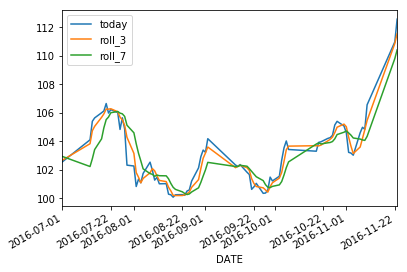

In [0]:
data.loc['2016-07': '2016-11', ['today', 'roll_3', 'roll_7'] ].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb61c0917b8>]],
      dtype=object)

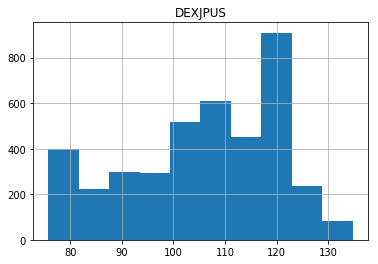

In [0]:
fx_jpusdata.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf6b5ecb70>]],
      dtype=object)

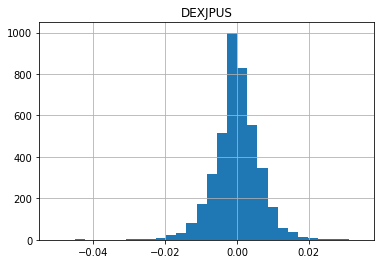

In [0]:
fx_jpusdata_ratio = fx_jpusdata.pct_change()
fx_jpusdata_ratio.hist(bins=30)

In [0]:
# 複数のデータの描画
merge_data_jpusdata = pd.concat([
    fx_jpusdata,
    fx_jpusdata.rolling(3).mean(),
    fx_jpusdata.rolling(7).mean(),
], axis=1)
merge_data_jpusdata.columns = ['today', 'roll_3', 'roll_7']
data = merge_data_jpusdata.dropna()
data.head()

,today,roll_3,roll_7
DATE,,,
2001-01-10,116.26,116.290000,115.645714
2001-01-11,117.56,116.820000,116.050000
2001-01-12,117.76,117.193333,116.550000
2001-01-24,118.18,117.250000,117.484286
2001-01-25,116.91,117.346667,117.431429


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb61c61cbe0>,
      dtype=object)

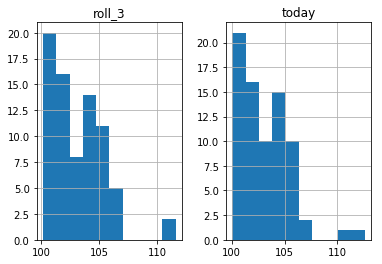

In [0]:
data.loc['2016-07': '2016-11', ['today', 'roll_3'] ].hist()

## 時系列の予測モデル

In [0]:
from sklearn import linear_model
model = linear_model.LinearRegression()

start_term = '2016-01'
end_term = '2016-12'

In [0]:
data = fx_jpusdata.dropna()

In [0]:
merge_data_jpusdata = pd.concat([
    fx_jpusdata,
    fx_jpusdata.shift(1),
], axis=1)

merge_data_jpusdata.columns = ['today', 'pre_1']
data = merge_data_jpusdata.dropna()
data.head()

,today,pre_1
DATE,,
2001-01-03,114.26,114.73
2001-01-04,115.47,114.26
2001-01-05,116.19,115.47
2001-01-08,115.97,116.19
2001-01-09,116.64,115.97


In [0]:
train = data.loc[start_term: end_term]
X_train = pd.DataFrame(train['pre_1'])
y_train = train['today']

test = data.loc[end_term]
X_test = pd.DataFrame(test['pre_1'])
y_test = test['today']

In [0]:
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9770816684872464
0.6195252421800354


### Q.１日前のデータに加えて、２日前、3日前のデータを加えて予測モデルを構築して下さい。

In [0]:
merge_data_jpusdata = pd.concat([
    fx_jpusdata,
    fx_jpusdata.shift(1),
    fx_jpusdata.shift(2),
    fx_jpusdata.shift(3),
], axis=1)
merge_data_jpusdata.columns = ['today', 'pre_1','pre_2', 'pre_3']
data = merge_data_jpusdata.dropna()
data.head()

,today,pre_1,pre_2,pre_3
DATE,,,,
2001-01-05,116.19,115.47,114.26,114.73
2001-01-08,115.97,116.19,115.47,114.26
2001-01-09,116.64,115.97,116.19,115.47
2001-01-10,116.26,116.64,115.97,116.19
2001-01-11,117.56,116.26,116.64,115.97


In [0]:
for pre_list in (['pre_1'], ['pre_1', 'pre_2'], ['pre_1', 'pre_2', 'pre_3']):
  
  print(pre_list)
  train = data.loc[start_term: end_term]
  X_train = pd.DataFrame(train[pre_list])
  y_train = train['today']
  
  test = data.loc[end_term]
  X_test = pd.DataFrame(test[pre_list])
  y_test = test['today']
  
  fit_model = model.fit(X_train, y_train)
  print(fit_model.score(X_train, y_train))
  print(fit_model.score(X_test, y_test))
  print('\n')

['pre_1']
0.9759377935960414
0.6276202389908685


['pre_1', 'pre_2']
0.9759701182338182
0.6221336857411088


['pre_1', 'pre_2', 'pre_3']
0.975970648050098
0.6209995837875




In [0]:
print(fit_model.score(X_train, y_train))
print(fit_model.score(X_test, y_test))

0.975970648050098
0.6209995837875


### ローリングを用いた予測モデルの構築

In [0]:
merge_data_jpusdata = pd.concat([
    fx_jpusdata,
    fx_jpusdata.shift(1),
    fx_jpusdata.shift(3),
    fx_jpusdata.rolling(3).mean(),
], axis=1)
merge_data_jpusdata.columns = ['today', 'pre_1','pre_3', 'roll_3']
data = merge_data_jpusdata.dropna()
data.head()

,today,pre_1,pre_3,roll_3
DATE,,,,
2001-01-05,116.19,115.47,114.73,115.306667
2001-01-08,115.97,116.19,114.26,115.876667
2001-01-09,116.64,115.97,115.47,116.266667
2001-01-10,116.26,116.64,116.19,116.290000
2001-01-11,117.56,116.26,115.97,116.820000


In [0]:
for pre_list in (['pre_1'], ['pre_1', 'pre_3'], ['pre_1', 'pre_3', 'roll_3']):
  
  print(pre_list)
  train = data.loc[start_term: end_term]
  X_train = pd.DataFrame(train[pre_list])
  y_train = train['today']
  
  test = data.loc[end_term]
  X_test = pd.DataFrame(test[pre_list])
  y_test = test['today']
  
  fit_model = model.fit(X_train, y_train)
  print(fit_model.score(X_train, y_train))
  print(fit_model.score(X_test, y_test))
  print('\n')

['pre_1']
0.9759377935960414
0.6276202389908685


['pre_1', 'pre_3']
0.9759591297914951
0.6193887017797362


['pre_1', 'pre_3', 'roll_3']
0.9921771915733022
0.8387908268280633




In [0]:
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9921771915733022
0.8387908268280633


### ドル -ユーロ情報の追加

In [0]:
# 為替レートデータをロード
start_date = '2001/1/2'
end_date = '2016/12/30'

fx_jpusdata = pdr.DataReader('DEXJPUS', 'fred', start_date, end_date)
fx_useudata = pdr.DataReader('DEXUSEU', 'fred', start_date, end_date)

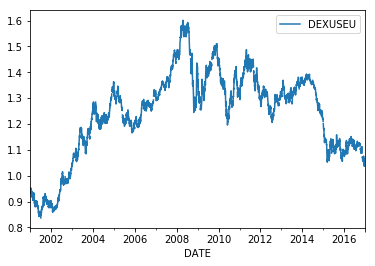

In [3]:
fx_useudata.plot()

In [0]:
from sklearn import linear_model
model = linear_model.LinearRegression()

start_term = '2016-01'
test_end_term = '2016-11'
end_term = '2016-12'

In [5]:
merge_data_jpusdata = pd.concat([
    fx_jpusdata,
    fx_jpusdata.shift(1),
    fx_jpusdata.rolling(3).mean(),
    fx_useudata.shift(1)
], axis=1)
merge_data_jpusdata.columns = ['today','pre_1', 'roll_3', 'useu_pre_1']
data = merge_data_jpusdata.dropna()
data.head()

,today,pre_1,roll_3,useu_pre_1
DATE,,,,
2001-01-04,115.47,114.26,114.820000,0.9473
2001-01-05,116.19,115.47,115.306667,0.9448
2001-01-08,115.97,116.19,115.876667,0.9535
2001-01-09,116.64,115.97,116.266667,0.9486
2001-01-10,116.26,116.64,116.290000,0.9397


In [6]:
for pre_list in (['pre_1'], ['pre_1', 'roll_3'], ['pre_1', 'roll_3', 'useu_pre_1']):
  
  print(pre_list)
  train = data.loc[start_term: end_term]
  X_train = pd.DataFrame(train[pre_list])
  y_train = train['today']
  
  test = data.loc[end_term]
  X_test = pd.DataFrame(test[pre_list])
  y_test = test['today']
  
  fit_model = model.fit(X_train, y_train)
  print(fit_model.score(X_train, y_train))
  print(fit_model.score(X_test, y_test))
  print('\n')

['pre_1']
0.9765255364199313
0.5991325391884066


['pre_1', 'roll_3']
0.9880921624659176
0.8239788930557398


['pre_1', 'roll_3', 'useu_pre_1']
0.9887473382316199
0.8402381908141058




### Q.ドル - ユーロの情報を追加して精度を高めて下さい。

In [10]:
merge_data_jpusdata = pd.concat([
    fx_jpusdata,
    fx_jpusdata.shift(1),
    fx_jpusdata.rolling(2).mean(),
    fx_jpusdata.pct_change(),
    fx_useudata.shift(1),
], axis=1)
merge_data_jpusdata.columns = ['today','pre_1', 'roll_2', 'pct', 'useu_pre_1']
data = merge_data_jpusdata.dropna()
data.head()

,today,pre_1,roll_2,pct,useu_pre_1
DATE,,,,,
2001-01-03,114.26,114.73,114.495,-0.004097,0.9465
2001-01-04,115.47,114.26,114.865,0.010590,0.9473
2001-01-05,116.19,115.47,115.830,0.006235,0.9448
2001-01-08,115.97,116.19,116.080,-0.001893,0.9535
2001-01-09,116.64,115.97,116.305,0.005777,0.9486


In [16]:
for pre_list in (['pre_1'], ['pre_1', 'roll_2'], ['today','pre_1', 'roll_2', 'pct', 'useu_pre_1']):
  
  print(pre_list)
  train = data.loc[start_term: test_end_term]
  X_train = pd.DataFrame(train[pre_list])
  y_train = train['today']
  
  test = data.loc[end_term]
  X_test = pd.DataFrame(test[pre_list])
  y_test = test['today']
  
  fit_model = model.fit(X_train, y_train)
  print(fit_model.score(X_train, y_train))
  print(fit_model.score(X_test, y_test))
  print('\n')

['pre_1']
0.9757220599805512
0.6067006179685959


['pre_1', 'roll_2']
1.0
1.0


['today', 'pre_1', 'roll_2', 'pct', 'useu_pre_1']
1.0
1.0




In [20]:
start_term

'2016-01'

In [17]:
data.loc[start_term: test_end_term]

,today,pre_1,roll_2,pct,useu_pre_1
DATE,,,,,
2016-01-05,118.95,119.30,119.125,-0.002934,1.0803
2016-01-06,118.54,118.95,118.745,-0.003447,1.0743
2016-01-07,118.00,118.54,118.270,-0.004555,1.0762
2016-01-08,117.74,118.00,117.870,-0.002203,1.0860
2016-01-11,117.48,117.74,117.610,-0.002208,1.0885
2016-01-12,117.78,117.48,117.630,0.002554,1.0878
2016-01-13,118.06,117.78,117.920,0.002377,1.0837
2016-01-14,118.03,118.06,118.045,-0.000254,1.0862
2016-01-15,116.78,118.03,117.405,-0.010591,1.0862


In [18]:
data.loc[end_term]

,today,pre_1,roll_2,pct,useu_pre_1
DATE,,,,,
2016-12-01,114.34,114.34,114.340,0.000000,1.0578
2016-12-02,113.76,114.34,114.050,-0.005073,1.0634
2016-12-05,114.10,113.76,113.930,0.002989,1.0666
2016-12-06,113.98,114.10,114.040,-0.001052,1.0723
2016-12-07,113.50,113.98,113.740,-0.004211,1.0717
2016-12-08,114.16,113.50,113.830,0.005815,1.0758
2016-12-09,115.17,114.16,114.665,0.008847,1.0625
2016-12-12,115.34,115.17,115.255,0.001476,1.0541
2016-12-13,115.26,115.34,115.300,-0.000694,1.0606
